<a href="https://colab.research.google.com/github/hatungclovis/WordleGame/blob/main/Clovis_Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classes that scrape English words from the internet

In [ ]:
import os.path                  
import random
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
# Class for finding common English words (2,992) from the internet
class ScrapeCommonWords:
    
    '''
    This class accesses the website and extract the 2,992 English common words.
    - data members: url, response, page, and common_words
    - methods: init, repr, requestPage, readPageInfo, fetchCommonWords, and 
    saveCommonWords.
    '''    
    
    # init method
    def __init__(self):
        
        # The url of the website from which to get the common words
        self.url = 'https://www.ef.com/ca/english-resources/english-vocabulary/top-3000-words/'
        
        # Initialize the response variable from the website: call the
        # requestPage function
        self.response = self.requestPage()
        
        # Initialize the "page info" variable: call the
        # readPageInfo function.
        self.page = self.readPageInfo()
        
        # Initialize a variable to contain the common words: call the
        # fetchCommonWords function.
        self.common_words = self.fetchCommonWords()
        
    # repr method
    def __repr__(self):
        return f"Words in the database are: {self.common_words}"
    
    # request page method --> To request the information from the website    
    def requestPage(self):
        
        # Write a request, which returns all the information on the webpage
        response = requests.get(self.url)
        
        # Return the response
        return response
    
    # Method for reading the information on the page's website
    def readPageInfo(self):
        
        print("Looking for data...")
        
        # Check if the response from the website is not 
        # empty (response == <Response 200>).
        if str(self.response) == "<Response [200]>":
        
            # Parse the information into html format for data readability.
            page = BeautifulSoup(self.response.content, 'html.parser')
            
            # Return the readable page
            return page
        
        else:
            
            # Report that there is no content in the response from the website.
            print("Website not accessible for the moment.\
              Check your access to the website")
    
    # Method for cleaning and extracting the page information
    def fetchCommonWords(self):
        
        # Extract the words from the web page
        raw_words = self.page.find('div', class_="field-item even").find('p')
        
        # Clean and format the words
        words = str(raw_words).split("<br/>") # remove the ""<br/>"" characters
        words[0] = words[0].strip("<p>")      # remove the "<p>" character
        words[-1] = words[-1].strip("</p>")   # remove the "</p>" character
        
        # Remove words that contain "-" or abbreviations such as "CEO".
        words.remove("African-American")
        words.remove("CEO")
        words.remove("long-term")
        words.remove("DNA")
        words.remove("e-mail")
        words.remove("mm-hmm")
        words.remove("so-called")
        words.remove("n't")                       
        
        # Transform the list into a string so that
        # it can be saved as a txt file
        c_words = ','.join(words)
        
        return c_words
    
    # Method for saving the extracted words into a text file
    def saveCommonWords(self): 
        
        # Create a txt file and save the common English words
        with open('common_words.txt', 'w') as file:
            file.write(self.common_words)

In [ ]:
# Class for finding all English words (370,105 words) from the internet
class ScrapeAllWords:
    
    '''
    This class accesses the website and extract the 370,105 English words.
    - data members: url, response, page, and all_words
    - methods: init, repr, requestPage, readPageInfo, fetchAllWords, 
              and saveAllWords.
    '''       
    
    # init method
    def __init__(self):
        
        # The url of the website we will mine
        self.url = 'https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt'
        
        # Initialize the response variable from the website: call the
        # requestPage function
        self.response = self.requestPage()
        
        # Initialize the "page info" variable: call the
        # readPageInfo function.
        self.page = self.readPageInfo()
        
        # Initialize a variable to contain the all words: call the
        # fetchAllWords function.
        self.all_words = self.fetchAllWords()
    
    # repr method
    def __repr__(self):
        return f"Words in the database are: {self.all_words}"
    
    # A method for getting the page page's website    
    def requestPage(self):
        
        # We write a request, which returns the webpage with all its information
        response = requests.get(self.url)
        
        # Return the response from the page that contains the information we want
        return response
    
    # A method for transforming the page into a readable format
    def readPageInfo(self):
        
        print("Looking for data...")
        
        # Check if the response from the website is not 
        # empty (response == <Response 200>)
        if str(self.response) == "<Response [200]>":
        
            # Parse the information into html format for data readability.
            page = BeautifulSoup(self.response.content, 'html.parser')
            
            # Return the page
            return page
        
        else:
            
            # Report that there is no content in the response from the website.
            print("Website not accessible for the moment.\
             Check your access to the website")
    
    # A method for extracting the information from the page's website
    def fetchAllWords(self):
        
        # Cleaning and extracting the words
        words = str(self.page).split("\r\n")  # remove the "\r\n" characters
        words.remove(words[-1])               # remove the last item = ''
        all_words = ','.join(words)           # Transform into string 
        
        # return the string of comma-separated words
        return all_words
       
    # A method for saving the words in a text file
    def saveAllWords(self):
        with open('all_words.txt', 'w') as wd:
            wd.write(self.all_words)     

## Library: A class that accesses the downloaded word files

In [ ]:
# A class that contains the the database of all English words
class Library():
     
    '''
    This class reads and loads the files containing the downloaded English words.
    - data members: the class has no data members.
    - methods: init, repr, readCommonWordsFile, and readAllWordsFile.
    '''
    
    # init method
    def __init__(self):
        return None
        
    # repr method
    def __repr__(self):
        return "<Class for loading common English words for the game!>"
    
    # A method for reading and loading the common English words
    def readCommonWordsFile(self,file='common_words.txt'):
        
        # Check if file exists in the directory.
        if os.path.isfile('common_words.txt'):
            
            # Display the loading status to the user
            print("Loading Common English words...")
            
            # Open the file
            with open(file) as wordfile: 

                # read the words and put them in a list.
                c_wordslist = wordfile.read().split(",")
                print("Common English words loaded successfully.\n")
            
            # return the list of common English words
            return c_wordslist
        
        # If the file does not exist:
        else:
            
            print("Reloading data file for common English words...\n")
            
            # Call the saveCommonWords method from the class to get the
            # words from the internet.
            ScrapeCommonWords().saveCommonWords()
            
            # return by calling the method to read the downloaded file
            return Library.readCommonWordsFile('common_words.txt')
        
    # A method for reading the file that contains all English words
    def readAllWordsFile(self,w_file='all_words.txt'):
         
        # Check if file exists in the directory.
        if os.path.isfile('all_words.txt'):
            
            # Display the loading status to the user
            print("Loading all English words...")
            
            # Open the file
            with open(w_file) as wordsfile: 

                # read the words and put them in a list --> wordslist.
                wordslist = wordsfile.read().split(",")
                print("All English words loaded successfully.\n")
            
            # return the list
            return wordslist
        
        # If file does not exist:
        else:
            print("Reloading data file for all English words...\n")
            
            # Call the saveAllWords method from the class for finding the 
            # words on the internet.
            ScrapeAllWords().saveAllWords()
            
            # return by calling the method to read the downloaded file 
            return Library.readAllWordsFile('all_words.txt')

## UserInput class that checks it against a set of constraints

In [ ]:
# A class that takes the user inputs (number of guesses, length of words, guessed word).
class UserInput():
    '''
    This class takes the user input and checks it against a set of constraints.
    - data members: all_words and secret_word.
    - methods: init, repr, timeLength, wordLength, updateLength, 
              and getAndCheckUserGuess.
    '''
        
    def __init__(self,all_words):
        self.all_words = all_words        # list of all English words
        
    # repr method
    def __repr(self):
        return "<Class for getting the user input>"
    
    # A method for getting the maximum time the user has to spend
    def difficultyLevelAndRetries(self):
        
        # Inform the user about the time constraints
        print("The number of retries for guessing the secret word depends\
         of the difficulty level you choose.\n")
        print("You get: 7 tries for Easy,\n 5 tries for Medium,\
          \n 3 tries for Hard.\n")
        
        # Initialize a local variable that takes the user input
        level = input("Type 1 for Easy, 2 for Medium, or 3 for Hard:\n")
        
        # Use try-except to convert the input into an integer
        try:
            level = int(level)
            
            # Check if the value of the converted variable respects the 
            # choice constraints.
            if level in [1,2,3]:
                
                # check if level equla 1
                if level ==1:
                    
                    # set the number of retries to 7
                    retries = 7
                
                elif level ==1:
                    # set the number of retries to 5
                    retries = 5
                    
                else:
                    # set the number of retries to 3
                    retries = 3
                   
                # Return the retries variable
                return retries
            
            # Otherwise, ask the user to try again
            else:
                
                # remind the user about the time constraints.
                print("Choose numbers 1, 2, or 3, please!\n")
                
                # Return by calling back the timeLength method
                return self.difficultyLevelAndRetries()
                
        # Intercept the error if the conversion doesn't work.
        except:
            
            # Let the user know that they have to try again.
            print("Type acceptable values, please!\n")
            
            # Return by calling back of the timeLength method
            return self.difficultyLevelAndRetries()

    # A method for getting the length of words from which the user has to guess
    def wordLength(self):
        
        # Inform the user about the word length constraints.
        print("The word length has to be between 3 and 14 letters.")
        
        # Initialize a local variable that contains the user input
        length = input("Type the number of letters you want the secret word to have:\n")
        
        # Try to convert the input into an integer
        try:
            length = int(length)
            
            # Check if the value of the converted variable respects integer.
            if length >= 3 and length <= 14:
                
                # Return the converted variable
                return length
            
            # Otherwise, ask the user to try again
            else:
                
                # remind the user about the word length constraints
                print("Choose between 3 and 14 for word length, please!\n")
                
                # Return by calling the wordLength method
                return self.wordLength()
            
        # Intercept the error if the conversion doesn't work.
        except:
            
            # Ask the user to try again (input)
            print("Type positive integers, please!\n")
            
            # Return by calling the wordLength method
            return self.wordLength()
    
    # A method for updating the word_length
    def updateWordLength(self):
        # return a call of the wordLength method
        return self.wordLength()
    
    # A method for getting and checking the user input for guessed word.
    def getAndCheckUserGuess(self):
        
        # Ask the user to type their guess
        guess = input("Type your guessed word:")
         
        # Check if the guess is an English words in our database
        if guess.lower() in self.all_words:
            
            # Check if gues is the same length as secret word (global variable).
            if len(guess) == len(secret_word):
                
                # Return the uppercase of the guessed word
                return guess.upper()
            
            else:
                
                # Else, inform the use that the guessed word has to have the 
                # same length as the secret word.
                print("The your word is not of the same length as the\
                 secret word. Try again")
                
                # Return by calling back the getAndCheckUserGuess method
                return self.getAndCheckUserGuess()
        
        # Otherwise, user's guess is not a valid English word.
        else:
            print("Your word is not a valid English word. Try again.")
            
            # Return by calling back the getAndCheckUserGuess method
            return self.getAndCheckUserGuess()

## WordMatching class: A class accesses the secret word and guessed word, compares them and output the results in a coloured string.

In [ ]:
# A class that checks the similarities between the guessed word's and 
# secret_word characters and colours the results
class WordMatching():
    '''
    This class accesses the secret word and guessed word, compares them and 
    output the results in a coloured string.
    - data members: secret_word.
    - methods: init, repr, secretAndGuessedWordDict, correctCharacters,
                halfCorrectCharacters, wrongCharacters, and colouredWord.
    '''
    def __init__(self,secret_word):
        self.secret_word = secret_word
    
    def __repr__(self):
        return f"<A class for comparing the guessed and secret word's characters>"
    
    # A method for creating dictionaries that contain characters in secret and 
    # guessed word. 
    # A method that returns the guessed characters in 
    # secret word (in the right position)
    def secretAndGuessedWordDict(self):
        '''
        This method creates dictionaries that contain characters in 
        secret and guessed word.
        - argument: no argument
        - global variable: guess --> string
        - output: dict_secret_word, dict_guess --> dictionaries
        '''
        
        # Create dictionary that contains the secret word's characters as 
        # values and their indexes as keys.
        # Use dictionary comprehension.
        dict_secret_word = {index:letter for index,
                            letter in enumerate(secret_word)}

        # Create dictionary that contains the guessed word's characters as 
        # values and their indexes as keys
        # Use dictionary comprehension.
        dict_guess = {index:letter for index,letter in enumerate(guess)}

        # Return the two dictionaries
        return dict_secret_word, dict_guess

    # A method that returns the guessed characters in 
    # secret word (in the right position)
    def correctCharacters(self):
        '''
        This method leverages the global variables "dict_secret_word" and 
        "dict_guess" dictionaries. It returns a dictionary that contains the 
        correctly guessed characters in the secret word. 
        - arguments: no argument.
        - global variables: dict_secret_word and dict_guess --> dictionaries
        - output: correct_characters --> dictionary
        '''

        # Initiate a dictionary that will contain correctly-guessed characters 
        # in the secret word in the correct positions.
        correct_characters = {}

        # Loop over the keys of the "dict_secret_word" and 
        # "dict_guess" dictionaries.
        for index1,index2 in zip(dict_guess.keys(), dict_secret_word.keys()):

            # Check if the matching keys have matching characters in the two
            # words (secred and guess).
            if dict_guess[index1] == dict_secret_word[index2]:

                # Save the key and the matching character to the 
                # correct_characters dictionary
                correct_characters[index1] = dict_guess[index1]

                # Replace the matching character with "*" in the 
                # dict_guess dictionary.
                dict_guess[index1] = "*"

                # Replace the matched character with "*" in the 
                # dict_secret_word dictionary.
                dict_secret_word[index2] = "*"

        # Return the dictionary of correct characters
        return correct_characters

    # A method that returns guessed characters in secret word but in the 
    # wrong position.
    def halfCorrectCharacters(self):
        '''
        This method compares characters (keys) in the global dictionaries 
        "dict_secret_word" and "dict_guess"
        - arguments: no argument.
        - global variables: dict_secret_word and dict_guess --> dictionaries
        - output: half_correct_characters --> dictionary whose values are 
        characters in the secret word but wrong position
        '''

        # Initiate a dictionary that will contain the characters in the 
        # secret word but wrong position.
        half_correct_characters = {}

        # Loop over the keys of the "dict_guess" dictionary.
        for index1 in dict_guess.keys():

            # Loop over the keys of the "dict_secret_word" dictionary
            for index2 in dict_secret_word.keys():

                # Check if the value at index1 is not "*"
                if dict_guess[index1] != "*":

                    # Check if the value at index1 matches any value in the 
                    # "dict_secret_word" dictionary.
                    if dict_guess[index1] == dict_secret_word[index2]:

                        # Save the matching character to the 
                        # half_correct_characters dictionary.
                        half_correct_characters[index1] = dict_guess[index1]

                        # Replace the matching character with "*" in the 
                        # dict_guess dictionary.
                        dict_guess[index1] = "*"

                        # Replace the matched character with "*" in the 
                        # dict_secret_word dictionary.
                        dict_secret_word[index2] = "*"

        # Return the dictionary
        return half_correct_characters

    # A method that returns the guessed characters that are not in 
    # the secret word.
    def wrongCharacters(self):
        '''
        This method leverages the global variables "dict_guess" dictionary and 
        returns a dictionary that contains guessed characters that are not 
        in the secret word. 
        - arguments: no argument.
        - global variable: dict_guess --> dictionary
        - output: wrong_characters --> dictionary
        '''

        # create a dictionary that will contain the wrong characters
        # use dictionary comprehensions
        wrong_characters = {index:letter for index,
                            letter in dict_guess.items() if letter != '*'}

        # return the dictionary
        return wrong_characters    

    # A method for colouring the characters in guessed word
    def colouredWord(self):
        """
        This method colours the background of characters in guessed word
        based on wheter they are correct, half correct, or wrong.
        - arguments: secret_word --> string
        - output: guessed_outcomes --> string of coloured letters.
        """

        # Set local variables for background colors
        Green = "\u001b[42m"   # Green for characters in the right position
        Yellow = "\u001b[43m"  # Yellow for characters not in the right position
        Reset = "\u001b[0m"    # No color for characters not in the secret word

        # Initialize an empty string (local variable) that will contain 
        # the colored guessed word.
        guessed_outcomes = ""

        # Iterate through the range of the length of the secret word.
        for index in range(len(self.secret_word)):

            # Check if index is in keys of matched_characters dictionary.
            if index in correct_characters.keys():

                # Set green as the background color for the letter at this index  
                background = f"{Green} {correct_characters[index]} {Reset}"

            # Alternatively, check if index is in the keys of 
            # half_correct_characters dictionary
            elif index in half_correct_characters.keys():

                # Set yellow as the background color for the letter at this index 
                background = f"{Yellow} {half_correct_characters[index]} {Reset}"

            # Otherwise, the index is in keys of wrong_characters dictionary
            else:

                # Set no color for the background of the letter at this index  
                background = f" {wrong_characters[index]} "

            # Add "coloured char" to the string guessed_outcomes
            guessed_outcomes += background
        
        # print the outcomes for word matching.
        print(guessed_outcomes)
        return None

## Self-contained functions for some functionalities

In [ ]:
# A function for displaying the welcom message.
def welcome():
    """ A function to display the welcome message"""
    return print("Welcome to the Wordle game - another version!")

# A function that returns a non-empty list of words whose length 
# equals word_length --> integer
def desiredWordsList(common_words,word_length):
    '''
    This function returns a non-empty list of words of equal 
    length (length == equal word_length --> integer). The secret word is then
    randomly selected from this non-empty list.
    - arguments:
                common_words--> list of common English words.
                word_length --> int
    - output: desired_wordslist --> list (words whose lengths == word_length)
    '''
    
    # use comprehension lists to make the list containg uppercase words of 
    # desired length. Leverage the global variable "word_length"--> integer
    desired_wordslist = [word.upper() for word in common_words 
                         if len(word) == word_length]
        
    # Check if desired list is empty
    if desired_wordslist is None or len(desired_wordslist) == 0:
            
        # update the global variable "word_length".
        print("No word of that length can be found.")
        word_length = UserInput(all_words).updateWordLength()
        
        # Return by calling the function itself to remake the list
        return desiredWordsList(common_words,word_length)
    
    else:
        # return the list
        return desired_wordslist

# A function that randomly selects the secret word
def secretWord(desired_wordslist):
    '''
    This function returns a randomly-selected word from "desiredwordslist".
    - arguments: desiredwordslist-->list of common English words of equal length
    - output: secret_word --> string 
    ''' 
    # use random module to select a word from the list
    secret_word = random.choice(desired_wordslist)
    
    # return the secret word
    return secret_word

# A function that returns characters in secret word that are not yet 
# guessed by the user.
def hintCharacters():
    '''
    This function leverages the global variables "dict_secret_word" and 
    "dict_guess" dictionaries. It returns a dictionary that contains the 
    correctly guessed characters in the secret word. 
    - arguments: no argument.
    - global variables: dict_secret_word and dict_guess --> dictionaries
    - output: hints --> list
    '''
    
    # Create a list that contains not-yet-guessed characters of the secret word.
    # Use list comprehensions.
    hints = [letter for letter in dict_secret_word.values() if letter != "*" and
             letter not in half_correct_characters.values()]

    # return the list of hint characters
    return hints

def hintedCharacter():
    '''
    This function returns a random letter from the global variable 
    "hint_characters" (list of characters).
    - arguments: no argument.
    - global variable: hint_characters --> list of characters not yet 
                                            guessed by user.
    - output: hinted_letter --> string (a character not yet guessed by the user)
    '''
    
    # Check if the list "hint_characters" is not empty
    if len(hint_characters) != 0:

        # Randomly select a letter from the list
        hinted_letter = random.choice(hint_characters)
            
        # Remove the hinted letter from the list
        hint_characters.remove(hinted_letter)
        print(hinted_letter,"is in the secred word")
        
        # Return None
        return None

    # Otherwise, let the user know that there is no letter in the hintlist
    else:
        print("Sorry, there is not character to reveal to you.")

        # Return none
        return None

def askHint():
    '''
    This function asks the user if they wants a hint and calls a function 
    that displays it for them.
    - arguments: no argument.
    - global variable: 
                    hint_characters --> list
                    hintedCharacter() --> object in python (a function 
                    that displays the hinted character)
    - output: hinted_letter --> string (a character not yet guessed by the user)
    - return: None
    '''
    ask_hint = input("Do you need a hint? Type 'Y' or 'N':")
    
    # Lowercase the input
    ask_hint.lower()
    
    # Check if user input is yes
    if ask_hint == "y":
                     
        # print the hinted character to the user
        hintedCharacter()
        return None
    
    # Or check if user input is no
    elif ask_hint == "n":
        return None
    
    # Otherwise, remind the user to type either "Y" or "N".
    else:
        print("Type 'Y' or 'N' to accept or refuse the hint proposition.")
        # return by calling the function itself
        return askHint()

# A function that calculates the total score
def score(half_correct_characters, correct_characters,retries):
    """
    This function calculates the total score based the number of 
    remaining retries, and number of characters the user 
    guessed (correctly and half correctly).
    - arguments:
        half_correct_characters --> dict
        correct_characters --> dict
        retries --> int
    - output: total_score --> int
    """
        
    # Each remaining retry is worth 3 points.
    bonus = retries * 3

    # Each correct letter worths 1 point.
    # Each half correct letter worths 0.5 points.
    # Each wrong letter worths 0 points.
    total_score = len(correct_characters) + 0.5*(len(half_correct_characters)) + bonus
    
    # print the information about grading criteria
    print("You get 1 point for each matched correct letter (green)")
    print("You get 3 points for each remaining trial.")
    print("You get 0.5 points for each half correct letter (yellow).")
    print("Your total score is:", total_score)
    
    # return None
    return None

## Main body of the game: puts it all together.

In [ ]:
# display the welcome message
welcome()

# get the English words (common and all English words)
common_words = Library.readCommonWordsFile('common_words.txt')
all_words = Library.readAllWordsFile('all_words.txt')

# get the user input (for difficulty level and word length)
userinput = UserInput(all_words)
retries = userinput.difficultyLevelAndRetries()
word_length = userinput.wordLength()

# get the list of words of the same length (= word_length)
desired_wordslist = desiredWordsList(common_words,word_length)  

# call the function for getting the secret word
secret_word = secretWord(desired_wordslist)

# inform the user about the numbers of retries they have.
print(f"You have {retries} tries.")

# get the user's guessed word
guess = userinput.getAndCheckUserGuess()

# check similarities between the user's word and the secret word
word_matching = WordMatching(secret_word)
dict_secret_word,dict_guess = word_matching.secretAndGuessedWordDict()
correct_characters = word_matching.correctCharacters()
half_correct_characters = word_matching.halfCorrectCharacters()
wrong_characters = word_matching.wrongCharacters()

# print the results of the matching process
word_matching.colouredWord()

# use while loop until all the letters are correctly guessed or
# until the number of retries hits 0
while len(correct_characters) != len(secret_word) and retries !=0:
    
    print(f"You are remaining with {retries} tries.")

    # Retrieve list of characters to hint to the user
    hint_characters = hintCharacters()
    
    # ask the user if they want a hint
    # call the askHint function
    askHint()
        
    # update the guessed word by getting new user input
    guess = userinput.getAndCheckUserGuess()
        
    # update all the other values for mathing the new guessed and the secret word
    dict_secret_word,dict_guess = word_matching.secretAndGuessedWordDict()
    correct_characters = word_matching.correctCharacters()
    half_correct_characters = word_matching.halfCorrectCharacters()
    wrong_characters = word_matching.wrongCharacters()
    word_matching.colouredWord()
    
    # decrement "retries" by 1
    retries -= 1

# check if the number of tries = 0
if retries == 0:
    # print the secret word
    print("The secret word is:", secret_word)

print(f"Your remaining tries are: {retries}.")    
# call the function to calculate the total score
score(half_correct_characters,correct_characters,retries)

Welcome to the Wordle game - another version!
Reloading data file for common English words...

Looking for data...
Loading Common English words...
Common English words loaded successfully.

Reloading data file for all English words...

Looking for data...
Loading all English words...
All English words loaded successfully.

The number of retries for guessing the secret word depends         of the difficulty level you choose.

You get: 7 tries for Easy,
 5 tries for Medium,          
 3 tries for Hard.

Type 1 for Easy, 2 for Medium, or 3 for Hard:
1
The word length has to be between 3 and 14 letters.
Type the number of letters you want the secret word to have:
4
You have 7 tries.
Type your guessed word:boat
 B  O  A  T 
You are remaining with 7 tries.
Do you need a hint? Type 'Y' or 'N':dane
Type 'Y' or 'N' to accept or refuse the hint proposition.
Do you need a hint? Type 'Y' or 'N':y
E is in the secred word
Type your guessed word:easy
 E  A  S  Y 
You are remaining with 6 tries.
Do yo

## Miscellaneous: stats for the common English words

These functions deal with the data analysis side of the game. They provide information about the words (in terms of frequency) based on the length and first letters of the common words.

In [ ]:
# initiate a Pandas data frame
df_commonWords = pd.DataFrame(common_words, columns = ["Words"])

In [ ]:
# A function that groups the data by the length of words
def groupByWordLength(df_commonWords):
    """
    This function creates a "WordLength" column and groups the words by 
    their lengths.
    - arguments:
        df_commonWords --> Pandas dataframe
    - output: group_by_wordlength --> Pandas dataframe with an additional 
    column ("WordLength")
    """
    
    # create the "WordLength" column and add it to the df_commonWords data frame
    df_commonWords["WordLength"] = df_commonWords.Words.str.len()
    
    # group the words by their length and store this in a variable
    group_by_wordlength = df_commonWords.groupby(["WordLength"])["Words"].count()
    
    # return the created variable (Pandas dataframe)
    return group_by_wordlength

def plotByWordLength(group_by_wordlength):
    """
    This function creates a graph for visualizing the grouped data in the 
    dataframe.
    - arguments:
        group_by_wordlength --> Pandas dataframe
    - output: bar graph --> plot (graph)
    """
       
    group_by_wordlength.plot.bar(ylabel="Numbers", title="Word count by length",
                                 figsize=(15, 10))
    return None

In [ ]:
def getFirstLetter(df_commonWords):
    """
    This function creates a "First Letter" column and add it to the df_commonWords dataframe.
    - arguments:
        df_commonWords --> Pandas dataframe
    - output: none --> Pandas dataframe with an additional column ("WordLength")
    """
     
    # create the "First Letter" column and at it to the dataframe
    df_commonWords["FirstLetter"] = df_commonWords.Words.str[0]
    
    # lower the data in the newly created column ("FirstLetter").
    df_commonWords["FirstLetter"] = df_commonWords.FirstLetter.str.lower()
    
    # return None
    return None

def groupByFirstLetter(df_commonWords):
    """
    This function groups the words by their first letter.
    - arguments:
        df_commonWords --> Pandas dataframe
    - output: group_by_first_letter --> Pandas dataframe (containing the grouped data)
    """
    
    # create a variable that stores the grouped data
    group_by_first_letter = df_commonWords.groupby("FirstLetter")["Words"].count()
    
    # return the created variable
    return group_by_first_letter

def plotByFirstLetter(group_by_first_letter):
    """
    This function creates a graph for visualizing the grouped data in the 
    data frame.
    - arguments:
        group_by_first_letter --> Pandas dataframe
    - output: bar graph --> plot (graph)
    """
    
    # create a plot (visualization) of the grouped data.
    group_by_first_letter.plot.bar(ylabel="Numbers",
                                   title="Word count by first letter", 
                                   figsize=(15, 10))
    return None

#### Putting it all together

Group by word length

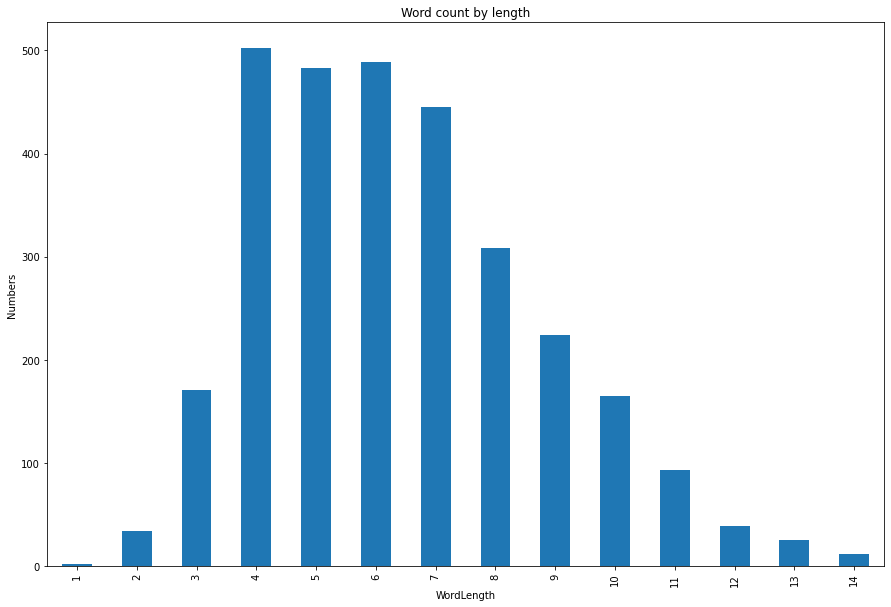

In [ ]:
# call the group-by-word-length function
group_by_wordlength = groupByWordLength(df_commonWords)

# call the function for visualizing the results
plotByWordLength(group_by_wordlength)

In the graph above, we see that the words of length 4, followed by 6, 5, and 7 are the most predominant in the common English words. This means that, these words (if the secret word was randomly chosed from this set) have higher chances of being the secret word.

Group by "first letter"

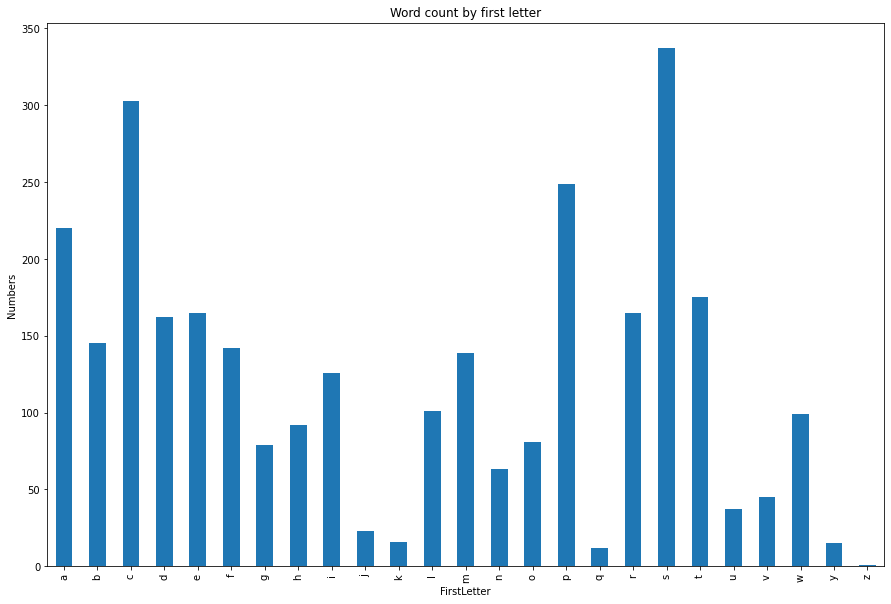

In [ ]:
# Call the function for getting the first letters of each word and 
# add a new column.
getFirstLetter(df_commonWords)

# group the data by the words' first letters
group_by_first_letter = groupByFirstLetter(df_commonWords)

# plot the results
plotByFirstLetter(group_by_first_letter)

In the graph above, we see that the words with first letters as "s", followed by "c", and "p" are the most predominant in the common English words. This means that, these words (if the secret word was randomly chosed from this set) have higher chances of being the secret word.